In [1]:
%matplotlib inline

from modsim import *

from pandas import read_csv

filename = 'india_2.csv'
table = read_csv(filename, header=0, index_col=0, decimal='M')



In [95]:
system = System(alpha = 0.025, beta = -0.00185, plus = 449480608, delta = 0)

In [3]:
table.columns = ['avg_pop']

In [78]:
def plotting(x_1, x_2):
    newfig()
    
    plot(x_1, ':', color='darkblue', label='Simulation')
    plot(x_2, '-', color='red', label='Data')
    decorate(xlabel='Year',
    ylabel='World Population (Billion)')

In [79]:
first_year = table.avg_pop.index[0]
last_year = table.avg_pop.index[-1]

avg_pop = table.avg_pop / 1e9 # in Billion

first_year

1960

In [80]:
avg_pop[1960]

0.449480608

In [81]:

def slope(recent_year = 2016, past_year = 1960):
    
    
    pop_difference = avg_pop[recent_year] - avg_pop[past_year]
    elapsed_time = recent_year - past_year
    annual_growth = pop_difference / elapsed_time
    
    return annual_growth
    print('Annual Growth:', annual_growth)
    
    
annual_growth = slope()
annual_growth

0.015619477607142856

In [82]:
def simulating_pop_linear(starting_year = 1960, ending_year = 2016):
    
    results = TimeSeries()
    results[starting_year] = avg_pop[starting_year]
    
    for t in linrange(starting_year, ending_year):
        results[t + 1] = results[t] + annual_growth
        
    
    return results

    
calculated_pop_linear = simulating_pop_linear()

In [93]:
system = System(alpha = 0.0270, beta = -0.0084)

def simulating_pop_quadratic(starting_year = 1960, ending_year = 2025):
    
    results = TimeSeries()
    results[starting_year] = avg_pop[starting_year]
    
    for t in linrange(starting_year, ending_year):
        results[t + 1] = results[t] + system.alpha * results[t] + system.beta * results[t]**2
        
        
    return results
    
    

calculated_pop_quadratic = simulating_pop_quadratic()

avg_pop[1960]

0.449480608

Saving figure to file Population_Estimate_1_logistic.pdf


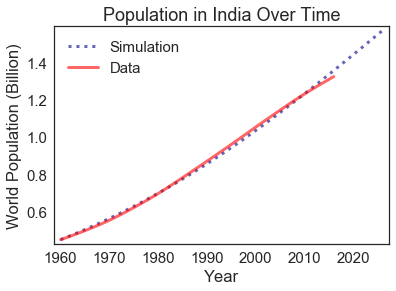

In [94]:
#QUADRATIC PLOTTING
plotting(calculated_pop_quadratic, avg_pop)
decorate(title='Population in India Over Time')
savefig('Population_Estimate_1_logistic.pdf')

Saving figure to file Population_Estimate_1_linear.pdf


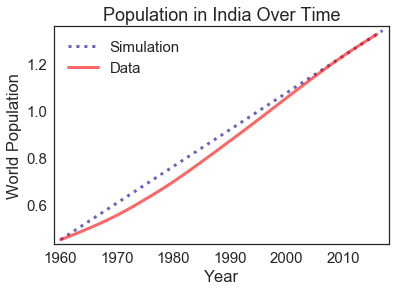

In [76]:
#LINEAR PLOTTING
plotting(calculated_pop_linear, avg_pop)
decorate(title='Population in India Over Time')
savefig('Population_Estimate_1_linear.pdf')

In [77]:
def simulate_until_pop(pop_limit = 1500000):
    
    results = TimeSeries()
    results[first_year] = avg_pop[first_year]
    
    
